<h1>Reading Data

In [1]:
import pandas as pd

# Load the training and test data
train_data=pd.read_csv('Genre Classification Dataset/train_data.txt',sep=":::",names=["Movie_name","Genere","Description"],engine="python")
test_data = pd.read_csv('Genre Classification Dataset/test_data.txt',sep=":::",names=["Movie_name","Description"],engine="python")



In [2]:
train_data.head()

,Movie_name,Genere,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
test_data.head()

,Movie_name,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


<h1>Cleaning dataset

In [4]:
# Check for missing values
print(train_data.isnull().sum())

Movie_name     0
Genere         0
Description    0
dtype: int64


<h1>Preprocessing Text

In [5]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import string
from nltk.corpus import stopwords
stop_words= stopwords.words('english')

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    words = word_tokenize(text)  # Tokenize text
    words = [word for word in words if word not in stop_words and len(word) > 2 and word not in string.punctuation]  # Remove stop words, short words, and punctuation
    text = " ".join(words)  # Join words back into a single string
    return text

train_data['Description'] = train_data['Description'].apply(clean_text)
test_data['Description'] = test_data['Description'].apply(clean_text)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<h1>Feature Extraction (Text- Vectorization)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()  

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the training data
X_train = vectorizer.fit_transform(train_data['Description'])
y_train = label_encoder.fit_transform(train_data['Genere'])

# Transform the test data
X_test = vectorizer.transform(test_data['Description'])


<h1>Model Training

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

k=10000

# Naive Bayes (no scaling needed)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
print("Naive Bayes model trained.")

# Logistic Regression with Standard Scaling and SelectKBest
lr_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('select_k_best', SelectKBest(chi2, k=k)),
    ('logistic_regression', LogisticRegression(max_iter=10000))  # Increased max_iter
])

# Train Logistic Regression model
lr_pipeline.fit(X_train, y_train)
print("Logistic Regression model trained.")

# SVM with Standard Scaling and SelectKBest
svm_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('select_k_best', SelectKBest(chi2, k=k)),
    ('svm', SVC(kernel='linear', max_iter=10000))  # Increased max_iter
])

# Train SVM model
svm_pipeline.fit(X_train, y_train)
print("SVC model trained.")

Naive Bayes model trained.
Logistic Regression model trained.
SVC model trained.


c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


<h1>Model Evaluation

In [12]:
# Load test data
test_data_solution = pd.read_csv('Genre Classification Dataset/test_data_solution.txt', sep=":::", names=["Movie_name", "Genere", "Description"], engine="python")

# Encode test labels
y_test = label_encoder.transform(test_data_solution['Genere'])

# Predictions
nb_pred = nb_model.predict(X_test)
lr_pred = lr_pipeline.predict(X_test)
svm_pred = svm_pipeline.predict(X_test)

# Accuracy
nb_accuracy = accuracy_score(y_test, nb_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Classification reports with zero_division handling
nb_report = classification_report(y_test, nb_pred, zero_division=0)
lr_report = classification_report(y_test, lr_pred, zero_division=0)
svm_report = classification_report(y_test, svm_pred, zero_division=0)

print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")


print("\nNaive Bayes Classification Report:\n", nb_report)
print("\nLogistic Regression Classification Report:\n", lr_report)
print("\nSVM Classification Report:\n", svm_report)

Naive Bayes Accuracy: 0.4446494464944649
Logistic Regression Accuracy: 0.3809409594095941
SVM Accuracy: 0.14584870848708487

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1314
           1       0.00      0.00      0.00       590
           2       0.00      0.00      0.00       775
           3       0.00      0.00      0.00       498
           4       0.00      0.00      0.00       264
           5       0.71      0.04      0.08      7446
           6       0.00      0.00      0.00       505
           7       0.53      0.90      0.67     13096
           8       0.38      0.88      0.53     13612
           9       0.00      0.00      0.00       783
          10       0.00      0.00      0.00       322
          11       0.00      0.00      0.00       193
          12       0.00      0.00      0.00       243
          13       0.00      0.00      0.00      2204
          14       0.00     

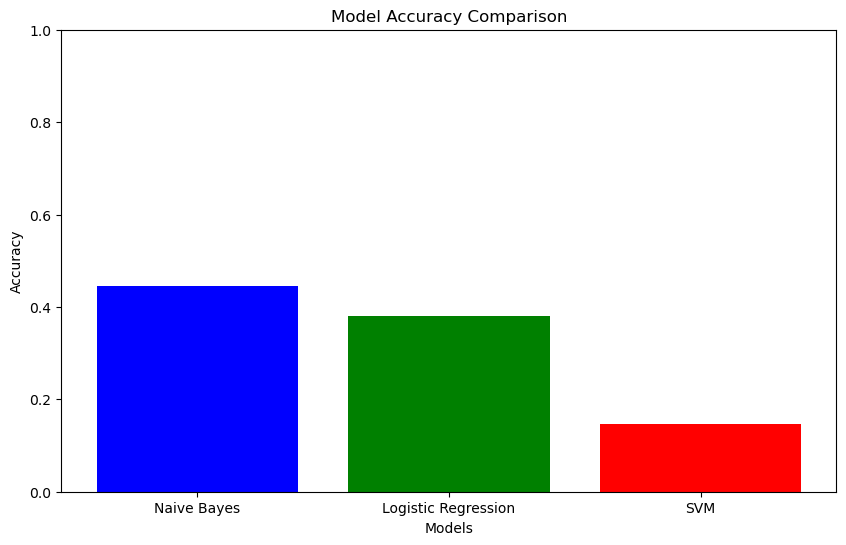

In [9]:
import matplotlib.pyplot as plt

# Define model names and accuracies
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [nb_accuracy, lr_accuracy, svm_accuracy]

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy
plt.show()

Based on the bar chart showing model accuracy comparison:

<li>Naive Bayes performs the best among the three models with an accuracy close to 0.45.
<li>Logistic Regression follows with slightly lower accuracy, just above 0.3.
<li>SVM has the lowest accuracy, significantly below 0.2.
<li>The chart indicates that Naive Bayes is the most effective model for this particular dataset, while SVM underperforms.

In [10]:
import joblib

joblib.dump(nb_model, 'naive_bayes_model_best.joblib')

print("Naive Bayes model has been serialized and saved as 'naive_bayes_model_best.joblib'.")


Naive Bayes model has been serialized and saved as 'naive_bayes_model_best.joblib'.
